In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from random import randrange


def draw(g):
    n = g.number_of_nodes()
    pos = nx.kamada_kawai_layout(g)
    labels = {}
    for i in range(n):
        labels[i] = str(i)

    nx.draw_networkx_labels(
        g,
        pos,
        labels,
        font_size=10,
        font_color="black"
    )

    node_size = 30
    nx.draw_networkx_nodes(
        g,
        pos,
        nodelist=[i for i in range(n)],
        node_color="red",
        node_size=node_size,
    )

    nx.draw_networkx_edges(
        g,
        pos,
        width=1,
        alpha=1,
        edge_color="black"
    )
    plt.show()

In [2]:
def generate_graph(n, k):
    visit = np.full(n, False, bool)
    g = [[] for _ in range(n)]
    visit[0] = True
    stack = [0]
    while stack or not np.all(visit):
        if not stack:
            for i in range(n):
                if not visit[i]:
                    stack.append(i)
                    visit[i] = True
                    g[i].append(0)
                    break
        v = stack.pop()
        for _ in range(randrange(1, k)):
            x = randrange(n)
            if x != v and x not in g[v] and v not in g[x]:
                g[v].append(x)
                if not visit[x]:
                    visit[x] = True
                    stack.append(x)

    edges = [(i, j) for i in range(n) for j in g[i]]
    return edges


def create_graph(n, k):
    g = nx.DiGraph()
    g.add_edges_from(generate_graph(n, k))
    while len([c for c in nx.strongly_connected_components(g)]) > 1:
        g = nx.DiGraph()
        g.add_edges_from(generate_graph(n, k))

    mat = np.zeros((n, n))
    for i in range(n):
        mat[i, list(g.neighbors(i))] = 1
    return g, mat


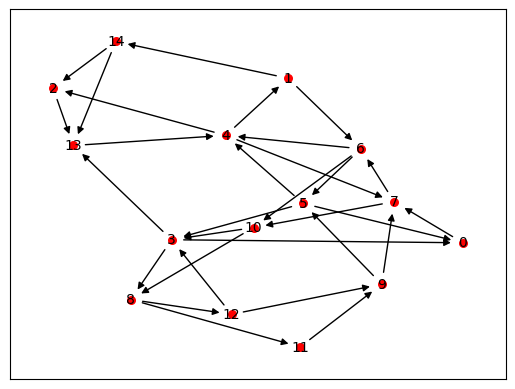

In [3]:
graph, matrix = create_graph(15, 4)
draw(graph)

In [4]:
def scaled_matrix(mat):
    return mat / np.sum(mat, axis=1)[:,None]

def power_method(mat):
    n = mat.shape[0]
    x = np.full(n, 1 / n, float)
    for _ in range(100):
        x = x @ mat
    return x


In [5]:
scal_matrix = scaled_matrix(matrix)
vector = power_method(scal_matrix)
print(np.argsort(vector)[::-1])
print(np.sort(vector)[::-1])

[ 4  7 13 10  6  3  8  2  5  9  1  0 12 11 14]
[0.13956149 0.11477598 0.09526533 0.08427073 0.08064824 0.07645377
 0.06761996 0.05815062 0.05224023 0.05071497 0.0465205  0.042898
 0.03380998 0.03380998 0.02326025]


In [6]:
def page_rank(mat, d=0.8):
    n = mat.shape[0]
    r = np.ones(n) / n
    e = r.copy()
    outer = (1 - d) * (e[:, None] @ np.ones(n)[:,None].T)
    for _ in range(100):
        r =  r @ (d*mat + outer)
    return r

In [7]:
vector2 = page_rank(scal_matrix)
print(np.argsort(vector2)[::-1])
print(np.sort(vector2)[::-1])

[ 4  7 13 10  6  3  8  9  2  5  0  1 12 11 14]
[0.12348584 0.10932001 0.09331613 0.0772124  0.07556649 0.07518289
 0.06426707 0.06018153 0.05899829 0.05755701 0.04873064 0.04626289
 0.03904016 0.03904016 0.03183849]


In [8]:
nx_pagerank = list(nx.pagerank(graph).items())

In [9]:
print(sorted(nx_pagerank, key=lambda x: -x[1]))

[(4, 0.12753745373106767), (7, 0.11102471828089253), (13, 0.09388897472612379), (10, 0.07894330014420184), (6, 0.07679382972167348), (3, 0.07550679817489733), (8, 0.06494462854356484), (2, 0.05871849718850331), (9, 0.05794211623232413), (5, 0.05638295331620945), (0, 0.04736935901896489), (1, 0.04613552532983548), (11, 0.037601821453725266), (12, 0.037601821453725266), (14, 0.029608202684290617)]
